# CodeRush Final Project
## By: Amit Duwal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data


In [2]:
# Read the CSV file
df = pd.read_csv('all_year.csv')

# Display the first few rows of the DataFrame
df.head()

,Title,Description,Domestic_BO,International_BO,Worldwide_BO,Distributor,Opening_amount,Release_date,Mpaa_rating,Running_time,Genres,In_release,Widest_release
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...","$804,793,477","$1,107,440,116","$1,912,233,593",Sony Pictures Entertainment (SPE),"$260,138,569","Dec 17, 2021",PG-13,2 hr 28 min,"Action,Adventure,Fantasy,Sci-Fi",524 days/74 weeks,"4,336 theaters"
1,House of Gucci,"When Patrizia Reggiani, an outsider from humbl...","$53,809,574","$99,459,587","$153,269,161",United Artists Releasing,"$14,423,794","Nov 24, 2021",R,2 hr 38 min,"Biography,Crime,Drama",403 days/57 weeks,"3,477 theaters"
2,The Matrix Resurrections,"Return to a world of two realities: one, every...","$37,686,805","$119,600,000","$157,286,805",Warner Bros.,"$10,749,011","Dec 22, 2021",R,2 hr 28 min,"Action,Sci-Fi",375 days/53 weeks,"3,552 theaters"
3,Jujutsu Kaisen 0,"Yuta Okkotsu, a high schooler who gains contro...","$34,542,754","$132,202,507","$166,745,261",Crunchyroll,"$18,009,921","Mar 18, 2022",PG-13,1 hr 45 min,"Action,Animation,Fantasy",289 days/41 weeks,"2,418 theaters"
4,Cliff Walkers,"In the puppet state of Manchukuo in the 1930s,...","$152,972","$181,172,593","$181,325,565",CMC Pictures,"$53,142","Apr 30, 2021",NaN,2 hr,"Crime,Drama,Thriller",246 days/35 weeks,65 theaters


### Data Cleaning

In [3]:
df.isna().sum()

Title                 0
Description           0
Domestic_BO           0
International_BO      0
Worldwide_BO          0
Distributor           3
Opening_amount       12
Release_date          1
Mpaa_rating         196
Running_time          1
Genres                0
In_release            0
Widest_release        8
dtype: int64

In [4]:
print(f"Original Data has shape: {df.shape}")

Original Data has shape: (974, 13)


drop rows with incorrect values

In [5]:
# Convert the 'Widest_release' column to string type
df['Widest_release'] = df['Widest_release'].astype(str)

# Drop rows where the last word in 'Widest_release' column is 'weeks'
df = df[~df['Widest_release'].str.endswith('weeks')]



In [6]:

# Drop rows where the last word in 'Genres' column is 'weeks'
df = df[~df['Genres'].str.endswith('weeks')]

In [7]:
df['Mpaa_rating'].fillna("Not Rated",inplace=True)

In [8]:
df['Distributor'].fillna("Unknown",inplace=True)

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Title               0
Description         0
Domestic_BO         0
International_BO    0
Worldwide_BO        0
Distributor         0
Opening_amount      0
Release_date        0
Mpaa_rating         0
Running_time        0
Genres              0
In_release          0
Widest_release      0
dtype: int64

In [11]:
print(f"Processed Data has shape: {df.shape}")

Processed Data has shape: (959, 13)


In [12]:
# Display the data type of each column
print(df.dtypes)

Title               object
Description         object
Domestic_BO         object
International_BO    object
Worldwide_BO        object
Distributor         object
Opening_amount      object
Release_date        object
Mpaa_rating         object
Running_time        object
Genres              object
In_release          object
Widest_release      object
dtype: object


Exporting cleaned data

In [13]:
df.to_csv('processed_file.csv', index=False)

### Data Visualization and Analysis

In [14]:
# Read the CSV file
df = pd.read_csv('processed_file.csv')

In [15]:
# Remove commas and convert the 'Domestic_BO', 'International_BO', and 'Worldwide_BO' columns to numeric types
df['Domestic_BO'] = df['Domestic_BO'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['International_BO'] = df['International_BO'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Worldwide_BO'] = df['Worldwide_BO'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [16]:
# Calculate the total domestic box office earnings
total_domestic_bo = df['Domestic_BO'].sum()

# Calculate the total international box office earnings
total_international_bo = df['International_BO'].sum()

# Calculate the total worldwide box office earnings
total_worldwide_bo = df['Worldwide_BO'].sum()

# Display the results

print("Total Domestic(US) Box Office Earnings:", total_domestic_bo)
print("Total International Box Office Earnings:", total_international_bo)
print("Total Worldwide Box Office Earnings:", total_worldwide_bo)
print("*after 2016")

Total Domestic(US) Box Office Earnings: 58861299572.0
Total International Box Office Earnings: 109730428802.0
Total Worldwide Box Office Earnings: 168607928564.0
*after 2016


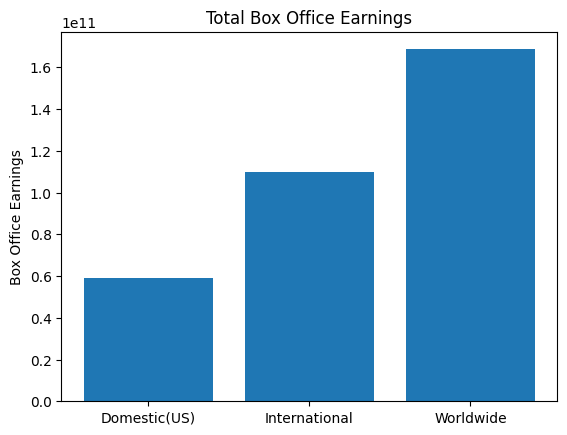

In [17]:
# Create a bar graph to visualize the results
earnings = [total_domestic_bo, total_international_bo, total_worldwide_bo]
labels = ['Domestic(US)', 'International', 'Worldwide']

plt.bar(labels, earnings)
plt.ylabel('Box Office Earnings')
plt.title('Total Box Office Earnings')
plt.show()

In [18]:
# Sort the DataFrame by 'International_BO' column in descending order and select the top 10 earners
top_international_earners = df.sort_values('International_BO', ascending=False).head(10)

# Sort the DataFrame by 'Domestic_BO' column in descending order and select the top 10 earners
top_domestic_earners = df.sort_values('Domestic_BO', ascending=False).head(10)

# Sort the DataFrame by 'Worldwide_BO' column in descending order and select the top 10 earners
top_worldwide_earners = df.sort_values('Worldwide_BO', ascending=False).head(10)

# Display the top 10 international earners
print("Top 10 International Box Office Earners:")
print(top_international_earners[['Title', 'International_BO']])

# Display the top 10 domestic earners
print("Top 10 Domestic Box Office Earners:")
print(top_domestic_earners[['Title', 'Domestic_BO']])

# Display the top 10 worldwide earners
print("Top 10 Worldwide Box Office Earners:")
print(top_worldwide_earners[['Title', 'Worldwide_BO']])



Top 10 International Box Office Earners:
                              Title  International_BO
465               Avengers: Endgame      1.941066e+09
590        Avatar: The Way of Water      1.636175e+09
164          Avengers: Infinity War      1.369544e+09
466                   The Lion King      1.113305e+09
0           Spider-Man: No Way Home      1.107440e+09
318         The Fate of the Furious      1.009997e+09
463                       Frozen II      9.726534e+08
954     The Battle at Lake Changjin      9.022061e+08
162  Jurassic World: Fallen Kingdom      8.907482e+08
311                  Wolf Warrior 2      8.676043e+08
Top 10 Domestic Box Office Earners:
                                       Title  Domestic_BO
465                        Avengers: Endgame  858373000.0
0                    Spider-Man: No Way Home  804793477.0
589                        Top Gun: Maverick  718732821.0
160                            Black Panther  700059566.0
590                 Avatar: The Way of 

In [19]:
def first_five_words(sentence):
    words = sentence.split()
    words_5 = words[:5]
    new_sentence = []
    for i, word in enumerate(words_5):
        if (i + 1) % 1 == 0:
            new_sentence.append(word + '\n')
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

In [20]:
max_list_in=[]
for title_name in top_international_earners['Title']:
    max_list_in.append(first_five_words(title_name))

max_list_do=[]
for title_name in top_domestic_earners['Title']:
    max_list_do.append(first_five_words(title_name))

max_list_wo=[]
for title_name in top_worldwide_earners['Title']:
    max_list_wo.append(first_five_words(title_name))

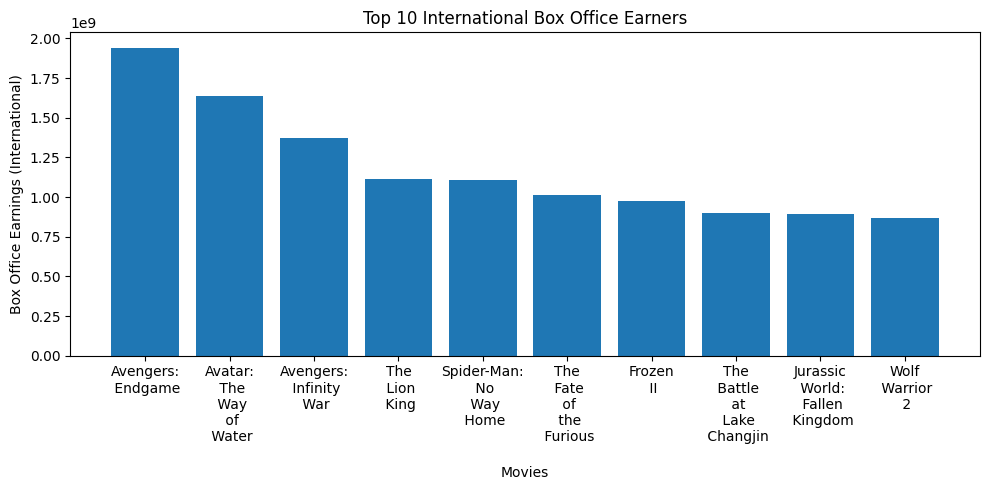

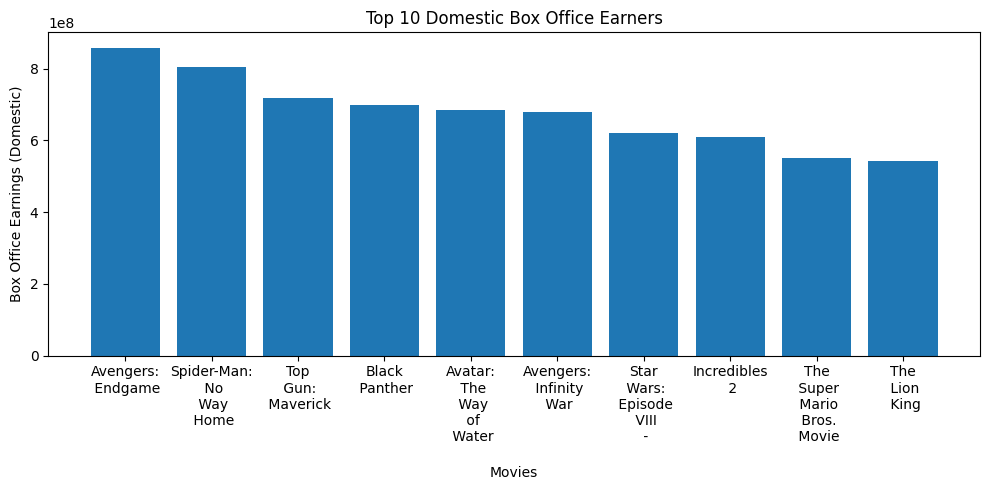

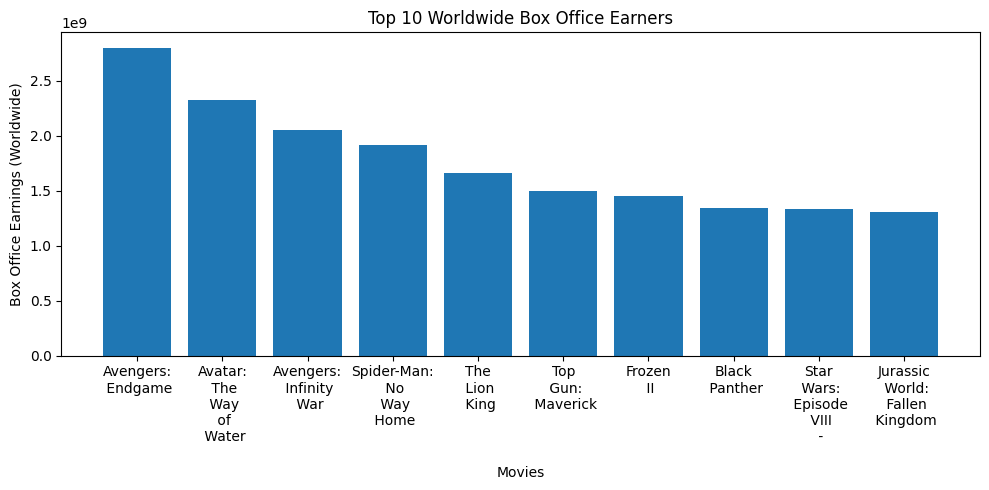

In [21]:
#International Box Office Earners
plt.figure(figsize=(10, 5))
plt.bar(max_list_in, top_international_earners['International_BO'])
plt.xlabel('Movies')
plt.ylabel('Box Office Earnings (International)')
plt.title('Top 10 International Box Office Earners')
plt.xticks(rotation=0, ha='center')  # Rotate labels horizontally
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

# Domestic Box Office Earners
plt.figure(figsize=(10, 5))
plt.bar(max_list_do, top_domestic_earners['Domestic_BO'])
plt.xlabel('Movies')
plt.ylabel('Box Office Earnings (Domestic)')
plt.title('Top 10 Domestic Box Office Earners')
plt.xticks(rotation=0, ha='center')  # Rotate labels horizontally
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

# Worldwide Box Office Earners
plt.figure(figsize=(10, 5))
plt.bar(max_list_wo, top_worldwide_earners['Worldwide_BO'])
plt.xlabel('Movies')
plt.ylabel('Box Office Earnings (Worldwide)')
plt.title('Top 10 Worldwide Box Office Earners')
plt.xticks(rotation=0, ha='center')  # Rotate labels horizontally
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

In [22]:
# Remove commas and dollar signs, and convert 'Opening_amount' column to numeric type
df['Opening_amount'] = df['Opening_amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [23]:
# Sort the DataFrame by 'Opening_amount' column in descending order and select the top 10 openings
top_10_openings = df.sort_values('Opening_amount', ascending=False).head(10)

# Display the top 10 openings
print("Top 10 Movie Openings:")
print(top_10_openings[['Title', 'Opening_amount']])

Top 10 Movie Openings:
                                           Title  Opening_amount
465                            Avengers: Endgame     357115007.0
0                        Spider-Man: No Way Home     260138569.0
164                       Avengers: Infinity War     257698183.0
317      Star Wars: Episode VIII - The Last Jedi     220009584.0
160                                Black Panther     202003951.0
466                                The Lion King     191770759.0
586  Doctor Strange in the Multiverse of Madness     187420998.0
161                                Incredibles 2     182687905.0
583               Black Panther: Wakanda Forever     181339761.0
804                   Captain America: Civil War     179139142.0


In [24]:
max_list_openings=[]
for title_name in top_10_openings['Title']:
    max_list_openings.append(first_five_words(title_name))

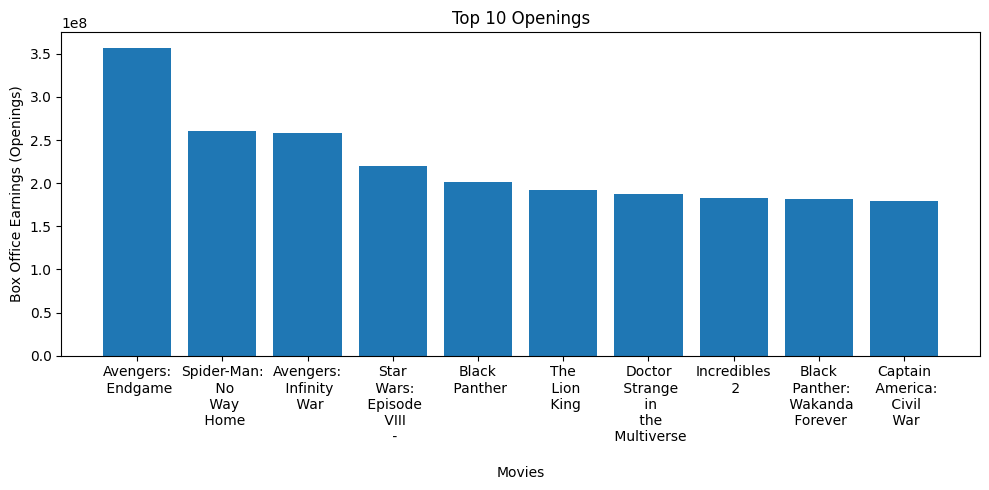

In [25]:
#Openings Box Office
plt.figure(figsize=(10, 5))
plt.bar(max_list_openings, top_10_openings['Opening_amount'])
plt.xlabel('Movies')
plt.ylabel('Box Office Earnings (Openings)')
plt.title('Top 10 Openings')
plt.xticks(rotation=0, ha='center')  # Rotate labels horizontally
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

In [26]:
# Perform value count on 'Distributor' column to get the count of movies for each company
distribution_counts = df['Distributor'].value_counts()

# Select the top distribution companies with the highest counts
top_distribution_companies = distribution_counts.head(10)

# Display the distribution companies with the highest number of movies
print("Distribution Companies with Highest Number of Movies:")
print(top_distribution_companies)

Distribution Companies with Highest Number of Movies:
Distributor
Universal Pictures                     103
Warner Bros.                            98
Lionsgate                               69
Sony Pictures Entertainment (SPE)       64
Paramount Pictures                      63
Walt Disney Studios Motion Pictures     58
Twentieth Century Fox                   50
Well Go USA Entertainment               49
Focus Features                          35
STX Entertainment                       23
Name: count, dtype: int64


In [27]:
top_dist_companies=[]
for dist_name in top_distribution_companies.index:
    top_dist_companies.append(first_five_words(dist_name))

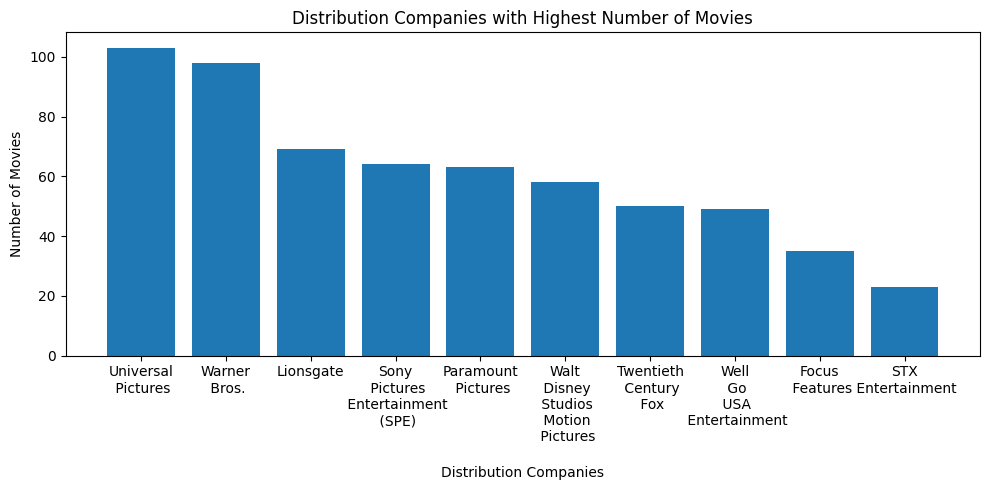

In [28]:
# Create bar graph to visualize the distribution companies with the highest number of movies
plt.figure(figsize=(10, 5))
plt.bar(top_dist_companies, top_distribution_companies.values)
plt.xlabel('Distribution Companies')
plt.ylabel('Number of Movies')
plt.title('Distribution Companies with Highest Number of Movies')
plt.xticks(rotation=0)  # Rotate x-axis labels vertically for readability
plt.tight_layout()  # Adjust spacing to prevent overlapping
plt.show()

In [29]:
# Group the data by 'Distributor' and calculate the sum of 'Worldwide_BO' for each distributor
distribution_bo = df.groupby('Distributor')['Worldwide_BO'].sum()

# Sort the distribution_bo Series in descending order and select the top 10 distributors
top_distributors = distribution_bo.sort_values(ascending=False).head(10)

# Display the distribution companies with the highest number of movies
print("Distribution Companies with Highest earnings from Movies:")
print(top_distributors)

Distribution Companies with Highest earnings from Movies:
Distributor
Walt Disney Studios Motion Pictures    3.803508e+10
Warner Bros.                           2.496954e+10
Universal Pictures                     2.477337e+10
Sony Pictures Entertainment (SPE)      1.584050e+10
Twentieth Century Fox                  1.185673e+10
Paramount Pictures                     1.075865e+10
Lionsgate                              6.726588e+09
Well Go USA Entertainment              5.535520e+09
CMC Pictures                           4.317406e+09
20th Century Studios                   3.322170e+09
Name: Worldwide_BO, dtype: float64


In [30]:
top_dist_companies_revenue=[]
for dist_name in top_distributors.index:
    top_dist_companies_revenue.append(first_five_words(dist_name))

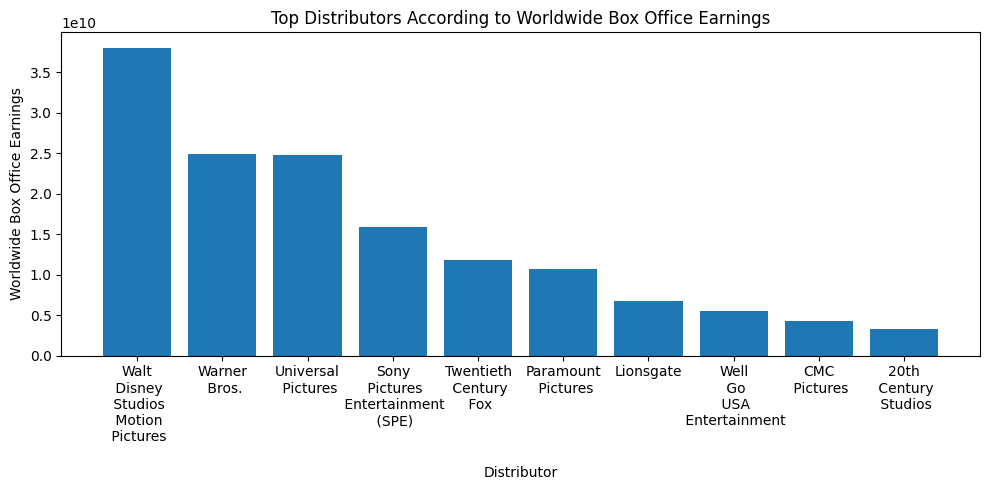

In [31]:
# Create bar graph to visualize the top distributors according to worldwide box office earnings
plt.figure(figsize=(10, 5))
plt.bar(top_dist_companies_revenue, top_distributors.values)
plt.xlabel('Distributor')
plt.ylabel('Worldwide Box Office Earnings')
plt.title('Top Distributors According to Worldwide Box Office Earnings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# Group the data by 'Distributor' and calculate the mean of 'Worldwide_BO' for each distributor
average_earnings = df.groupby('Distributor')['Worldwide_BO'].mean()

# Select the top 10 distributors with the highest average earnings
top_distributors_average = average_earnings.nlargest(10)

# Display the average earnings for each distributor
print("Average Earnings for Distributors:")
print(top_distributors_average)

Average Earnings for Distributors:
Distributor
The H Collective                       8.703254e+08
Walt Disney Studios Motion Pictures    6.557772e+08
UTV Motion Pictures                    3.037236e+08
20th Century Studios                   3.020154e+08
CMC Pictures                           2.878271e+08
Warner Bros.                           2.547912e+08
Sony Pictures Entertainment (SPE)      2.475078e+08
Universal Pictures                     2.405181e+08
Twentieth Century Fox                  2.371346e+08
Metro-Goldwyn-Mayer (MGM)              1.883061e+08
Name: Worldwide_BO, dtype: float64


In [33]:
top_dist_companies_average=[]
for dist_name in top_distributors_average.index:
    top_dist_companies_average.append(first_five_words(dist_name))

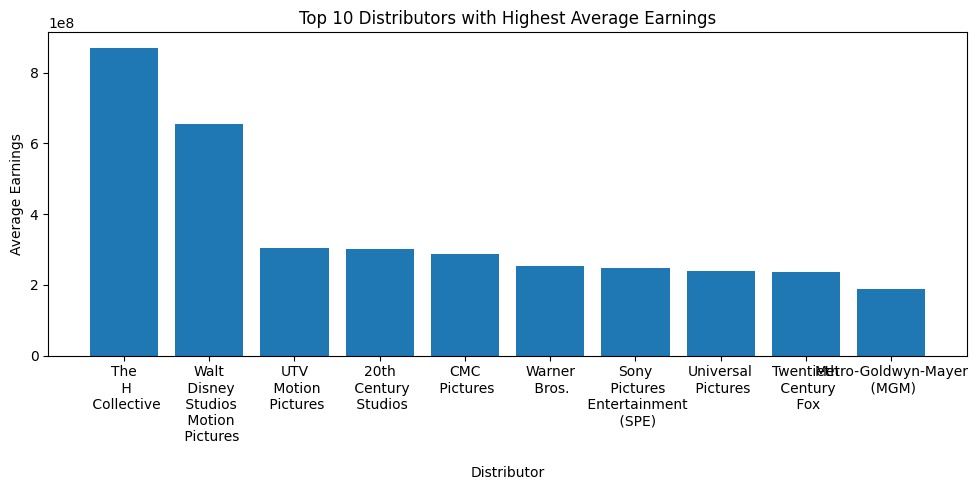

In [34]:
# Create bar graph to visualize the top 10 distributors with the highest average earnings
plt.figure(figsize=(10, 5))
plt.bar(top_dist_companies_average, top_distributors_average.values)
plt.xlabel('Distributor')
plt.ylabel('Average Earnings')
plt.title('Top 10 Distributors with Highest Average Earnings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### MPAA ratings

The new ratings system began with four categories: 
- G (general audiences)
- M (mature audiences, changed in 1969 to PG parental guidance suggested)
- R (restricted, no children under 17 allowed without parents or adult guardians) and
- X (no one under 17 admitted)

The ratings were revised several times over the years, to include in 1984 a new
- PG-13 label, and in 1990 a new NC-17 rating (which stands for no one 17 and under admitted). The NC-17 rating replaced the X rating, which came to signify pornography.

In [35]:
# Group the data by 'Mpaa_rating' and calculate the sum, count, and mean of 'Worldwide_BO' for each rating
rating_statistics = df.groupby('Mpaa_rating')['Worldwide_BO'].agg(['sum', 'count', 'mean'])

# Display the earnings, number of movies, and average earnings for each MPAA rating category
print("Statistics by MPAA Rating:")
print(rating_statistics)

Statistics by MPAA Rating:
                      sum  count          mean
Mpaa_rating                                   
G            1.626734e+09      4  4.066834e+08
Not Rated    1.789334e+10    188  9.517732e+07
PG           3.676377e+10    145  2.535432e+08
PG-13        8.174812e+10    322  2.538762e+08
R            3.057597e+10    300  1.019199e+08


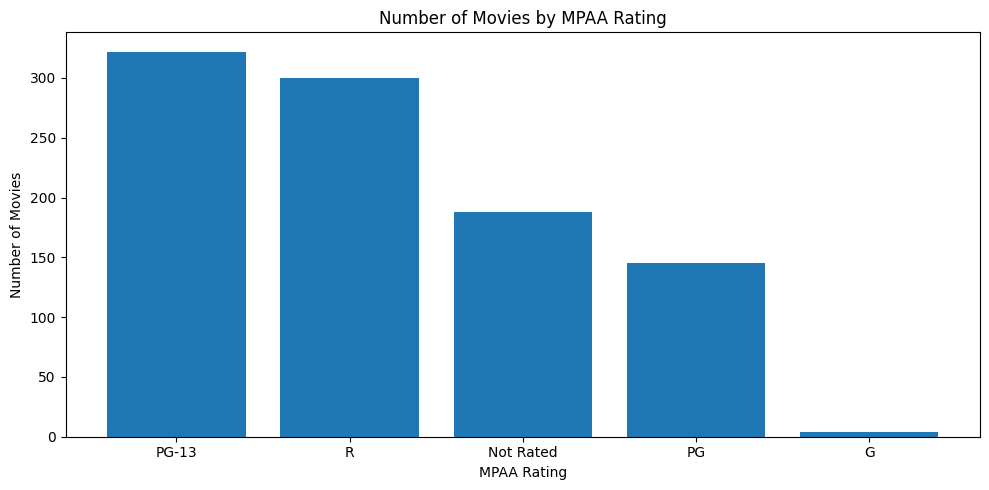

In [36]:
# Sort the ratings based on count in descending order
sorted_ratings = rating_statistics['count'].sort_values(ascending=False)

# Create bar graph to visualize the count of movies for each MPAA rating
plt.figure(figsize=(10, 5))
plt.bar(sorted_ratings.index, sorted_ratings.values)
plt.xlabel('MPAA Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by MPAA Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

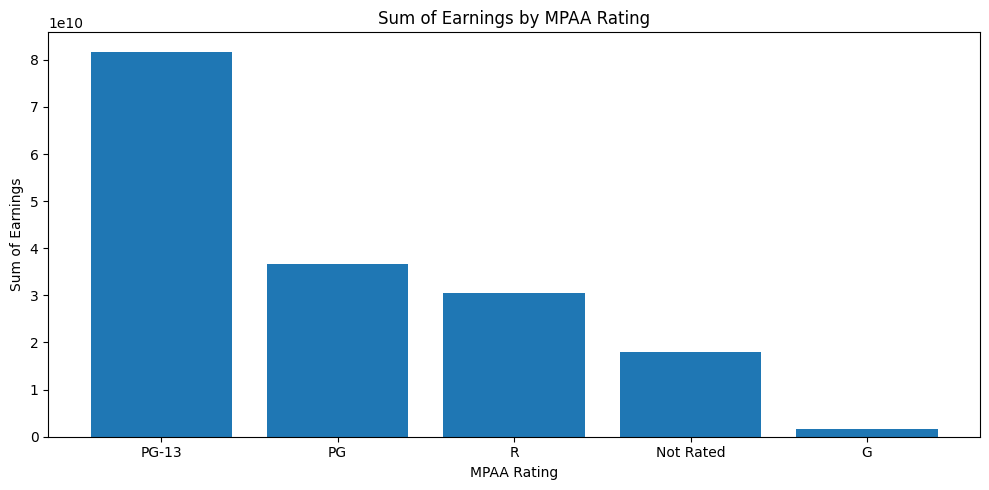

In [37]:
# Sort the ratings based on the sum of earnings in descending order
sorted_ratings = rating_statistics['sum'].sort_values(ascending=False)

# Create bar graph to visualize the sum of earnings for each MPAA rating
plt.figure(figsize=(10, 5))
plt.bar(sorted_ratings.index, sorted_ratings.values)
plt.xlabel('MPAA Rating')
plt.ylabel('Sum of Earnings')
plt.title('Sum of Earnings by MPAA Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

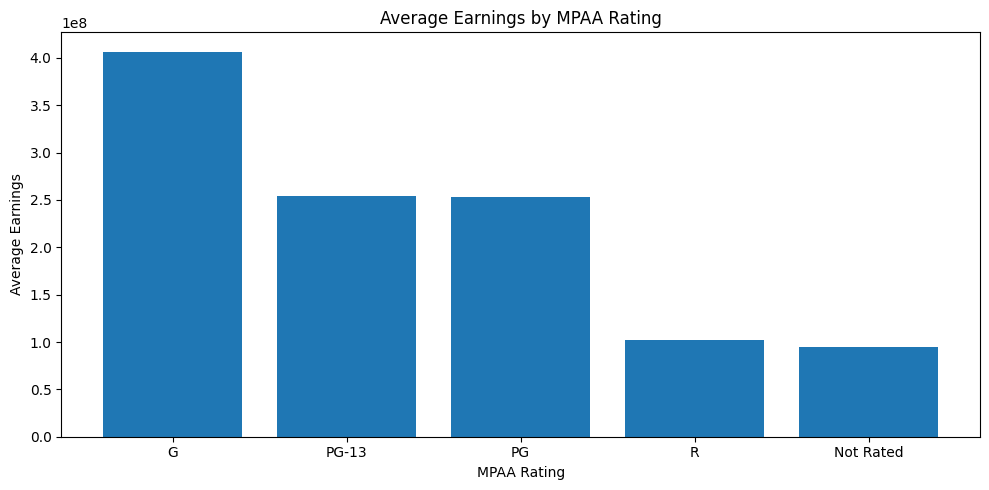

In [38]:
# Sort the ratings based on the average earnings in descending order
sorted_ratings = rating_statistics['mean'].sort_values(ascending=False)

# Create bar graph to visualize the average earnings for each MPAA rating
plt.figure(figsize=(10, 5))
plt.bar(sorted_ratings.index, sorted_ratings.values)
plt.xlabel('MPAA Rating')
plt.ylabel('Average Earnings')
plt.title('Average Earnings by MPAA Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
df1 = df.copy()

# Split the genre strings into individual genres using the comma delimiter
df1['Genres'] = df1['Genres'].str.split(',')

# Create a new dataframe by exploding the genre column
df_exploded = df1.explode('Genres')
df_exploded

,Title,Description,Domestic_BO,International_BO,Worldwide_BO,Distributor,Opening_amount,Release_date,Mpaa_rating,Running_time,Genres,In_release,Widest_release
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",804793477.0,1.107440e+09,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,"Dec 17, 2021",PG-13,2 hr 28 min,Action,524 days/74 weeks,"4,336 theaters"
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",804793477.0,1.107440e+09,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,"Dec 17, 2021",PG-13,2 hr 28 min,Adventure,524 days/74 weeks,"4,336 theaters"
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",804793477.0,1.107440e+09,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,"Dec 17, 2021",PG-13,2 hr 28 min,Fantasy,524 days/74 weeks,"4,336 theaters"
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",804793477.0,1.107440e+09,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,"Dec 17, 2021",PG-13,2 hr 28 min,Sci-Fi,524 days/74 weeks,"4,336 theaters"
1,House of Gucci,"When Patrizia Reggiani, an outsider from humbl...",53809574.0,9.945959e+07,1.532692e+08,United Artists Releasing,14423794.0,"Nov 24, 2021",R,2 hr 38 min,Biography,403 days/57 weeks,"3,477 theaters"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,No Time to Die,James Bond has left active service. His peace ...,160891007.0,6.132620e+08,7.741530e+08,Metro-Goldwyn-Mayer (MGM),55225007.0,"Oct 8, 2021",PG-13,2 hr 43 min,Thriller,450 days/64 weeks,"4,407 theaters"
958,Shang-Chi and the Legend of the Ten Rings,"Shang-Chi, the master of weaponry-based Kung F...",224543292.0,2.077000e+08,4.322433e+08,Walt Disney Studios Motion Pictures,75388688.0,"Sep 3, 2021",PG-13,2 hr 12 min,Action,126 days/18 weeks,"4,300 theaters"
958,Shang-Chi and the Legend of the Ten Rings,"Shang-Chi, the master of weaponry-based Kung F...",224543292.0,2.077000e+08,4.322433e+08,Walt Disney Studios Motion Pictures,75388688.0,"Sep 3, 2021",PG-13,2 hr 12 min,Adventure,126 days/18 weeks,"4,300 theaters"
958,Shang-Chi and the Legend of the Ten Rings,"Shang-Chi, the master of weaponry-based Kung F...",224543292.0,2.077000e+08,4.322433e+08,Walt Disney Studios Motion Pictures,75388688.0,"Sep 3, 2021",PG-13,2 hr 12 min,Fantasy,126 days/18 weeks,"4,300 theaters"


In [40]:
df

,Title,Description,Domestic_BO,International_BO,Worldwide_BO,Distributor,Opening_amount,Release_date,Mpaa_rating,Running_time,Genres,In_release,Widest_release
0,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",804793477.0,1.107440e+09,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,"Dec 17, 2021",PG-13,2 hr 28 min,"Action,Adventure,Fantasy,Sci-Fi",524 days/74 weeks,"4,336 theaters"
1,House of Gucci,"When Patrizia Reggiani, an outsider from humbl...",53809574.0,9.945959e+07,1.532692e+08,United Artists Releasing,14423794.0,"Nov 24, 2021",R,2 hr 38 min,"Biography,Crime,Drama",403 days/57 weeks,"3,477 theaters"
2,The Matrix Resurrections,"Return to a world of two realities: one, every...",37686805.0,1.196000e+08,1.572868e+08,Warner Bros.,10749011.0,"Dec 22, 2021",R,2 hr 28 min,"Action,Sci-Fi",375 days/53 weeks,"3,552 theaters"
3,Jujutsu Kaisen 0,"Yuta Okkotsu, a high schooler who gains contro...",34542754.0,1.322025e+08,1.667453e+08,Crunchyroll,18009921.0,"Mar 18, 2022",PG-13,1 hr 45 min,"Action,Animation,Fantasy",289 days/41 weeks,"2,418 theaters"
4,Cliff Walkers,"In the puppet state of Manchukuo in the 1930s,...",152972.0,1.811726e+08,1.813256e+08,CMC Pictures,53142.0,"Apr 30, 2021",Not Rated,2 hr,"Crime,Drama,Thriller",246 days/35 weeks,65 theaters
...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,The Battle at Lake Changjin,Set in the Second Phase Offensive of the Korea...,342411.0,9.022061e+08,9.025485e+08,CMC Pictures,105768.0,"Nov 19, 2021",Not Rated,2 hr 56 min,"Action,Drama,History,War",408 days/58 weeks,20 theaters
955,Godzilla vs. Kong,The epic next chapter in the cinematic Monster...,100916094.0,3.692000e+08,4.701161e+08,Warner Bros.,31625971.0,"Mar 31, 2021",PG-13,1 hr 53 min,"Action,Sci-Fi,Thriller",282 days/40 weeks,"3,084 theaters"
956,F9: The Fast Saga,Dom and the crew must take on an international...,173005945.0,5.532236e+08,7.262295e+08,Universal Pictures,70043165.0,"Jun 25, 2021",PG-13,2 hr 23 min,"Action,Crime,Thriller",196 days/28 weeks,"4,203 theaters"
957,No Time to Die,James Bond has left active service. His peace ...,160891007.0,6.132620e+08,7.741530e+08,Metro-Goldwyn-Mayer (MGM),55225007.0,"Oct 8, 2021",PG-13,2 hr 43 min,"Action,Adventure,Thriller",450 days/64 weeks,"4,407 theaters"


In [41]:
# Calculate the average total earnings and count of movies for each genre
genre_statistics = df_exploded.groupby('Genres')['Worldwide_BO'].agg(['mean', 'count'])

# Display the average total earnings and count of movies for each genre
print("Genre Statistics:")
print(genre_statistics)

Genre Statistics:
                     mean  count
Genres                          
Action       2.540874e+08    382
Adventure    3.212717e+08    314
Animation    2.580741e+08    116
Biography    8.285348e+07     83
Comedy       1.733603e+08    345
Crime        1.335059e+08    161
Documentary  2.863115e+07      9
Drama        1.177701e+08    469
Family       2.667409e+08    151
Fantasy      2.671845e+08    208
History      1.045666e+08     59
Horror       1.135008e+08    138
Music        1.539096e+08     33
Musical      3.910116e+08     28
Mystery      1.151026e+08    124
Romance      1.222961e+08    119
Sci-Fi       3.769410e+08    166
Sport        9.095689e+07     26
Thriller     1.394852e+08    310
War          1.935389e+08     33
Western      5.535760e+07      9


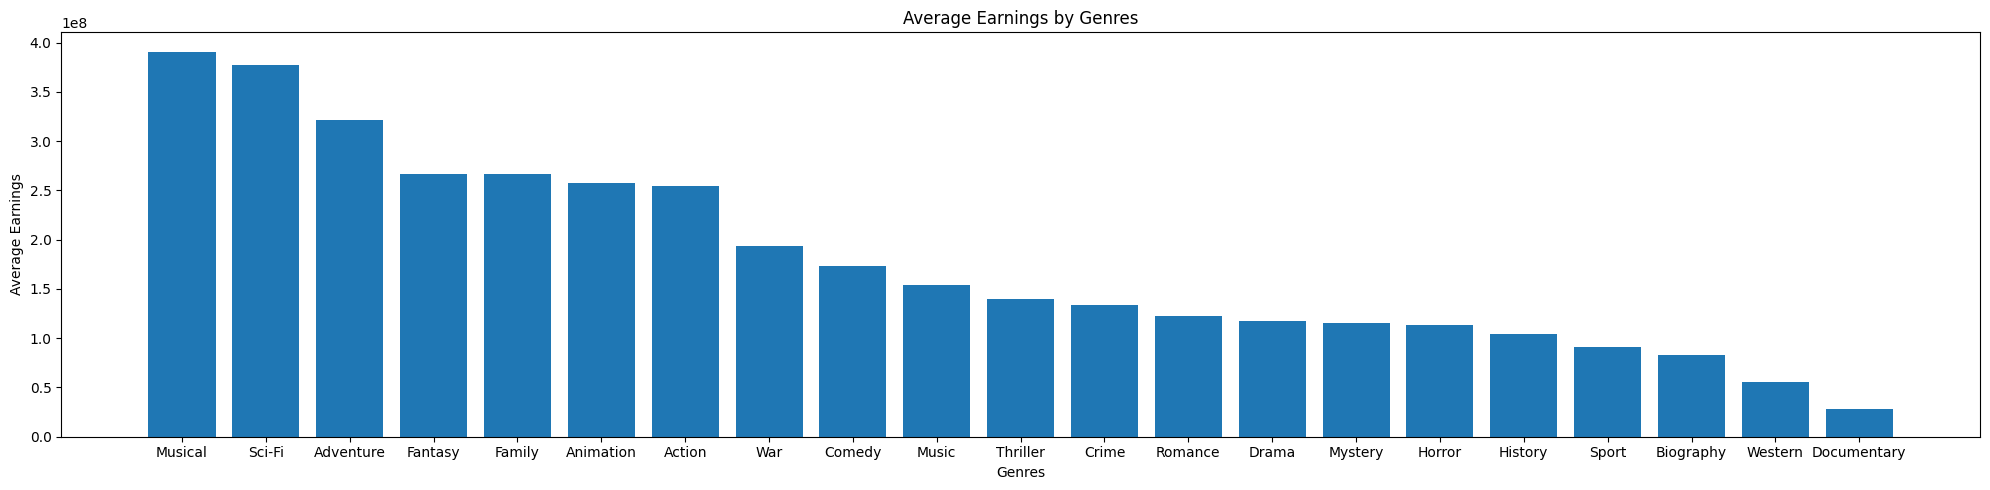

In [42]:
# Sort the genres based on the mean of earnings in descending order
sorted_genres = genre_statistics['mean'].sort_values(ascending=False)

# Create bar graph to visualize the mean of earnings for each genre
plt.figure(figsize=(20, 5))
plt.bar(sorted_genres.index, sorted_genres.values)
plt.xlabel('Genres')
plt.ylabel('Average Earnings')
plt.title('Average Earnings by Genres')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

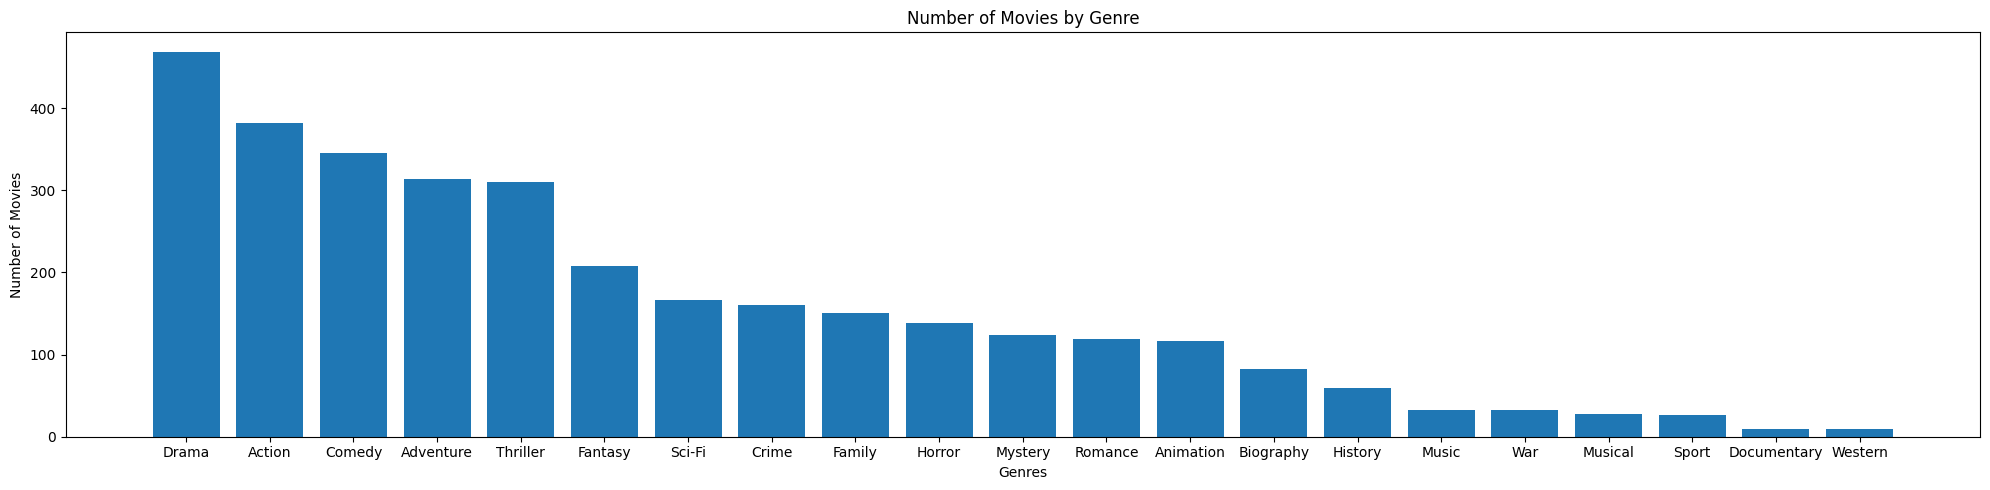

In [43]:
# Sort the genres based on the count in descending order
sorted_genres = genre_statistics['count'].sort_values(ascending=False)

# Create bar graph to visualize the count for each genre
plt.figure(figsize=(20, 5))
plt.bar(sorted_genres.index, sorted_genres.values)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Release date

In [44]:
# Create a new DataFrame with only the 'Worldwide_BO' and 'Release_date' columns
new_df = df[['Worldwide_BO', 'Release_date']].copy()

# Convert the 'Release_date' column to datetime format
new_df['Release_date'] = pd.to_datetime(new_df['Release_date'])

# Extract the day of the week from the 'Release_date' column
new_df['Day'] = new_df['Release_date'].dt.day_name()

# Calculate the total earnings, count of movies, and average earnings by day of the week
day_statistics = new_df.groupby('Day')['Worldwide_BO'].agg(['sum', 'count', 'mean'])

# Display the earnings, number of movies, and average earnings by day of the week
print("Day of the Week Release Statistics:")
print(day_statistics)


Day of the Week Release Statistics:
                    sum  count          mean
Day                                         
Friday     1.479306e+11    848  1.744465e+08
Monday     3.209298e+08      4  8.023244e+07
Saturday   5.634079e+07      2  2.817039e+07
Sunday     3.332268e+08      3  1.110756e+08
Thursday   3.034035e+09     22  1.379107e+08
Tuesday    2.848446e+09     11  2.589496e+08
Wednesday  1.408432e+10     69  2.041206e+08


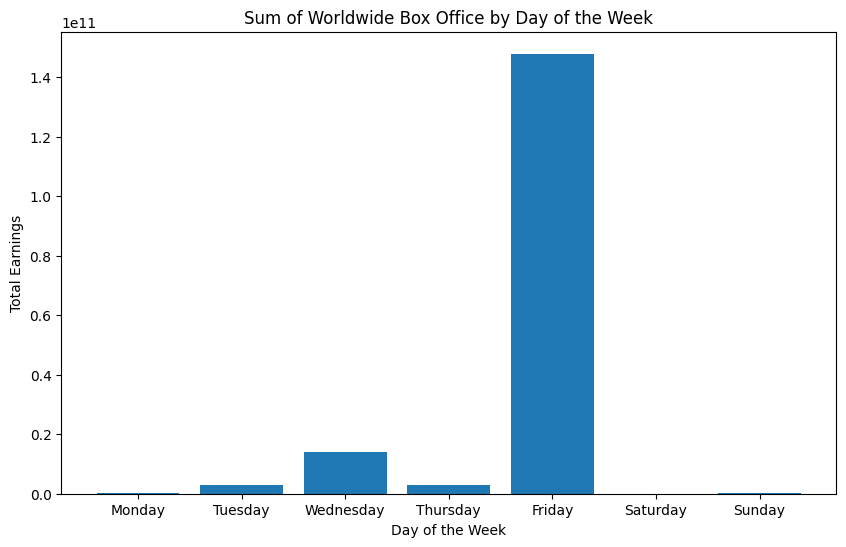

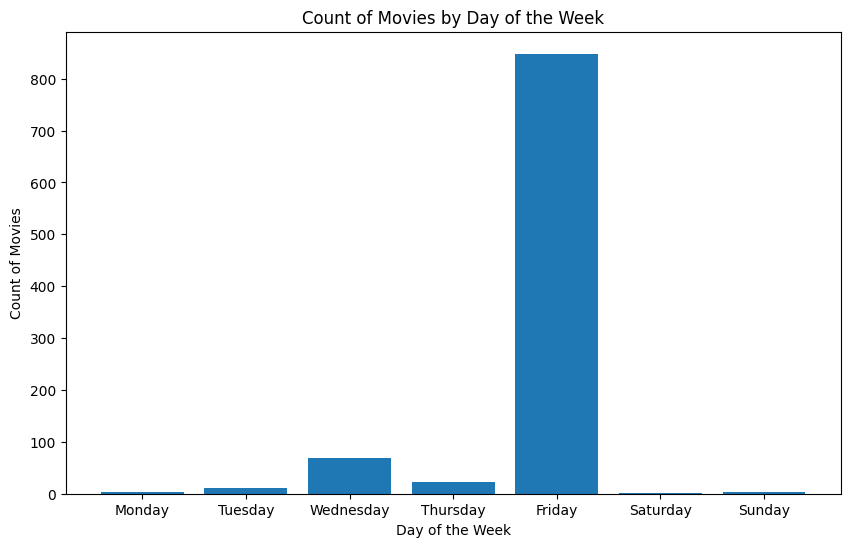

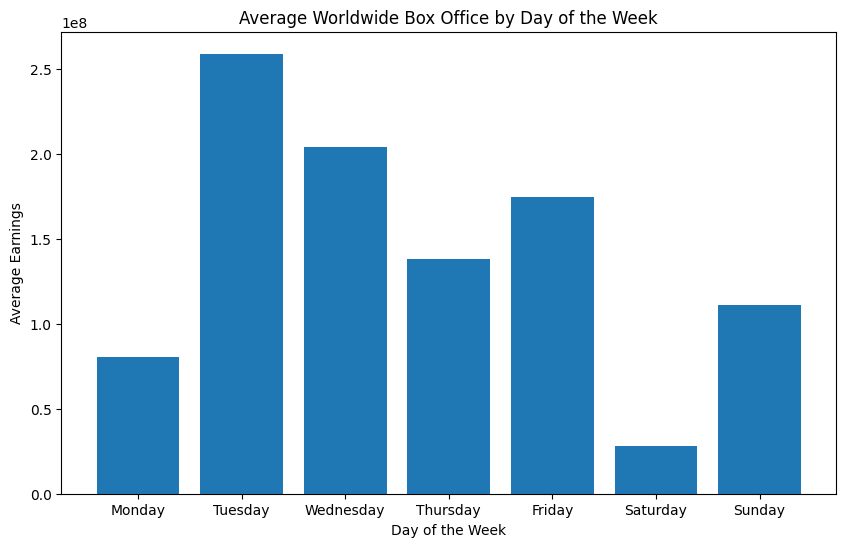

In [45]:
# Define the order of days of the week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the day_statistics DataFrame based on the defined order
day_statistics = day_statistics.loc[week_order]

# Plot the sum
plt.figure(figsize=(10, 6))
plt.bar(day_statistics.index, day_statistics['sum'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Earnings')
plt.title('Sum of Worldwide Box Office by Day of the Week')
plt.show()

# Plot the count
plt.figure(figsize=(10, 6))
plt.bar(day_statistics.index, day_statistics['count'])
plt.xlabel('Day of the Week')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Day of the Week')
plt.show()

# Plot the average
plt.figure(figsize=(10, 6))
plt.bar(day_statistics.index, day_statistics['mean'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Earnings')
plt.title('Average Worldwide Box Office by Day of the Week')
plt.show()


In [46]:
# Extract the month from the 'Release_date' column
new_df['Month'] = new_df['Release_date'].dt.month_name()

# Calculate the total earnings, count of movies, and average earnings by month
month_statistics = new_df.groupby('Month')['Worldwide_BO'].agg(['sum', 'count', 'mean'])

# Display the earnings, number of movies, and average earnings by month of the week
print("Month Release Statistics:")
print(month_statistics)

Month Release Statistics:
                    sum  count          mean
Month                                       
April      1.497355e+10     72  2.079660e+08
August     9.674357e+09     83  1.165585e+08
December   2.134358e+10     96  2.223290e+08
February   1.449139e+10     98  1.478713e+08
January    6.934075e+09     72  9.630660e+07
July       1.783420e+10     71  2.511860e+08
June       1.619684e+10     62  2.612393e+08
March      1.460257e+10     90  1.622508e+08
May        1.430699e+10     64  2.235467e+08
November   1.858301e+10     95  1.956106e+08
October    1.156596e+10     82  1.410483e+08
September  8.101413e+09     74  1.094785e+08


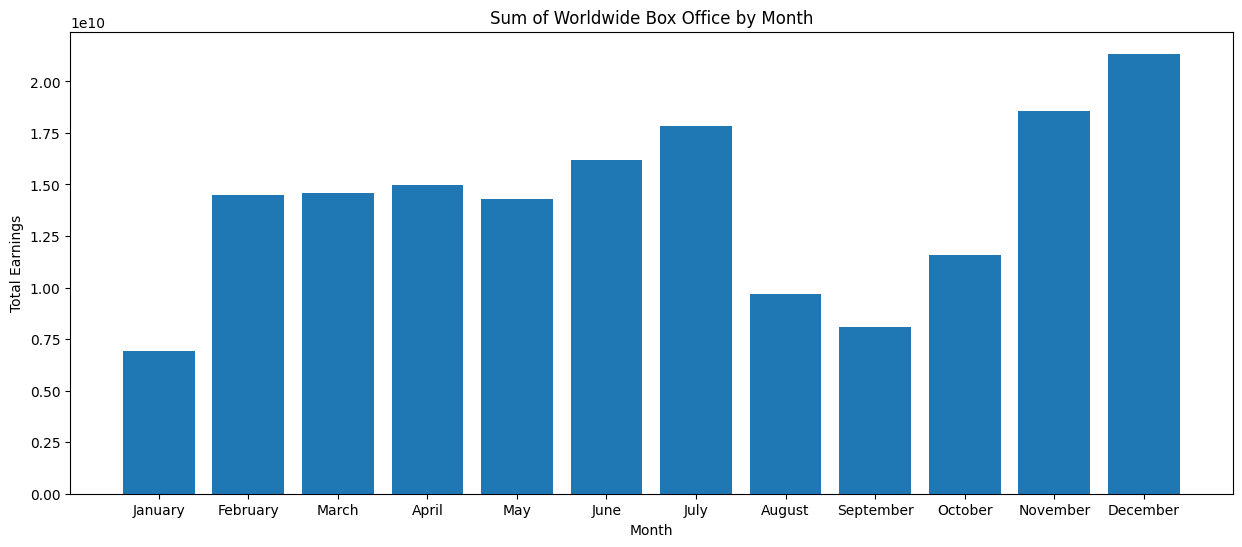

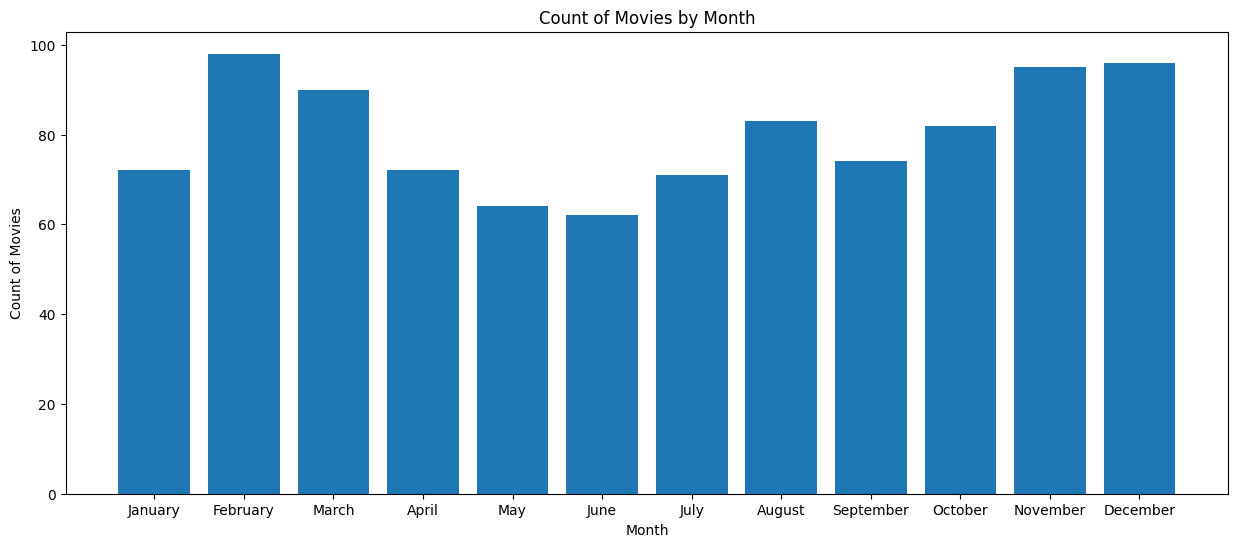

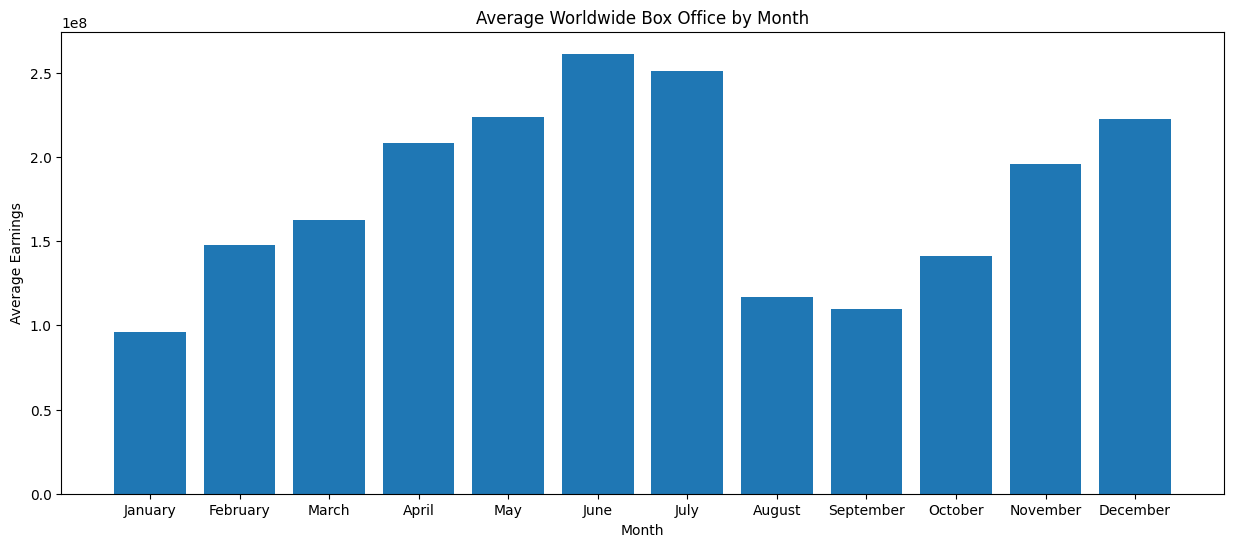

In [47]:
# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the month_statistics DataFrame based on the defined order
month_statistics = month_statistics.loc[month_order]

# Plot the sum
plt.figure(figsize=(15, 6))
plt.bar(month_statistics.index, month_statistics['sum'])
plt.xlabel('Month')
plt.ylabel('Total Earnings')
plt.title('Sum of Worldwide Box Office by Month')
plt.show()

# Plot the count
plt.figure(figsize=(15, 6))
plt.bar(month_statistics.index, month_statistics['count'])
plt.xlabel('Month')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Month')
plt.show()

# Plot the average
plt.figure(figsize=(15, 6))
plt.bar(month_statistics.index, month_statistics['mean'])
plt.xlabel('Month')
plt.ylabel('Average Earnings')
plt.title('Average Worldwide Box Office by Month')
plt.show()


In [48]:
# Extract the year from the 'Release_date' column
new_df['Year'] = new_df['Release_date'].dt.year

# Calculate the total earnings, count of movies, and average earnings by year
year_statistics = new_df.groupby('Year')['Worldwide_BO'].agg(['sum', 'count', 'mean'])

# Display the earnings, number of movies, and average earnings by Year
print("Year Release Statistics:")
print(year_statistics)

Year Release Statistics:
               sum  count          mean
Year                                   
2016  2.878616e+10    148  1.945011e+08
2017  3.278172e+10    159  2.061743e+08
2018  3.107679e+10    157  1.979413e+08
2019  3.269535e+10    150  2.179690e+08
2020  4.280216e+09     59  7.254604e+07
2021  1.444565e+10    100  1.444565e+08
2022  1.875953e+10    124  1.512865e+08
2023  5.782513e+09     62  9.326634e+07


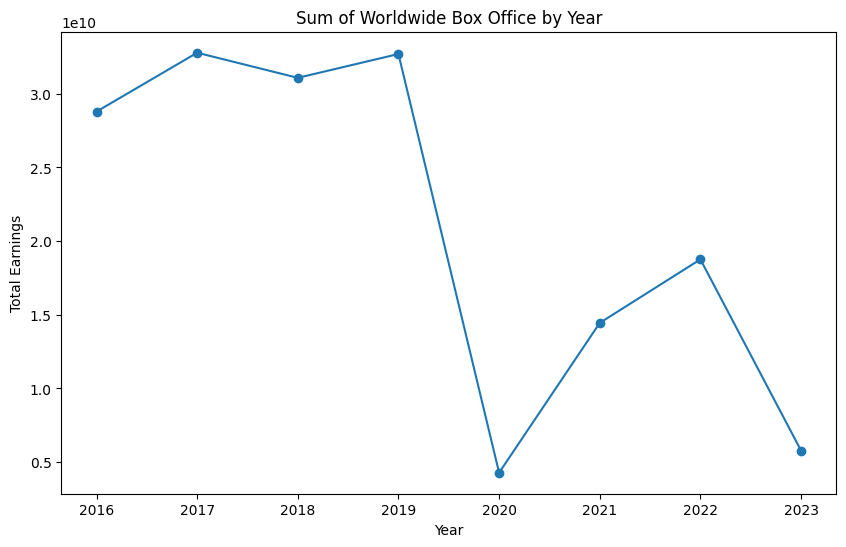

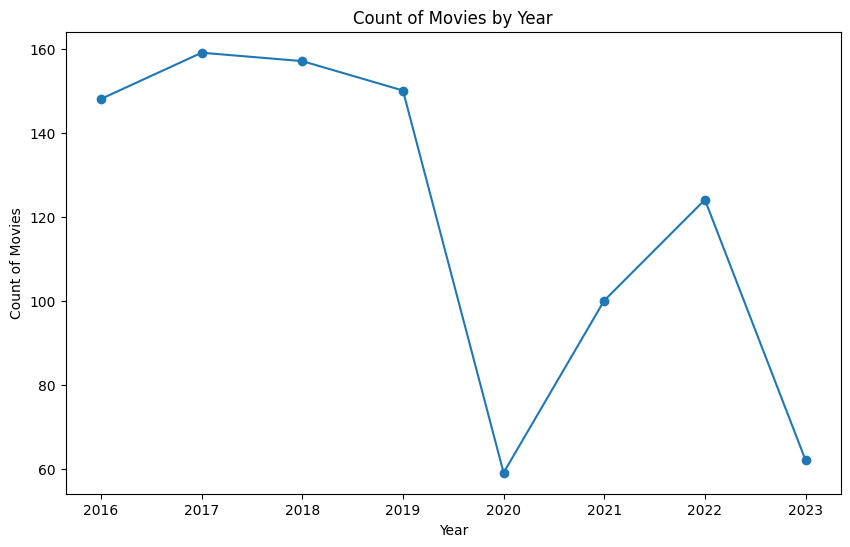

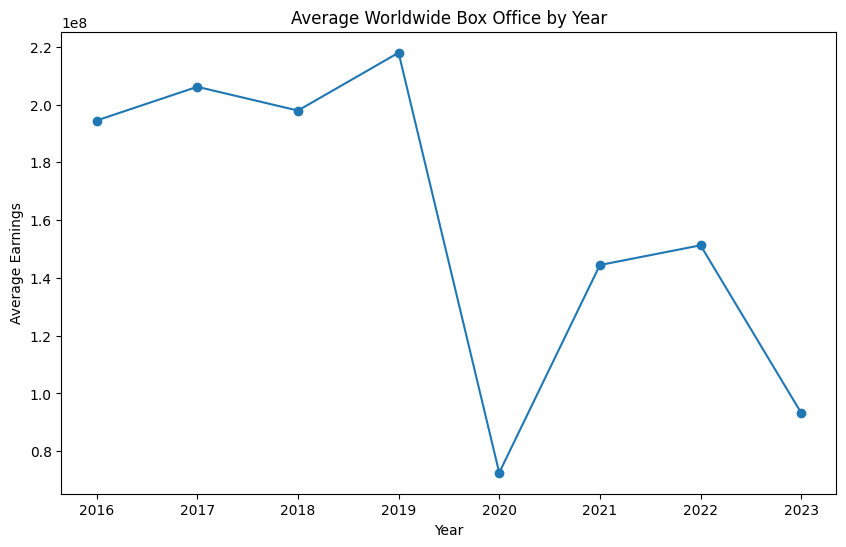

In [49]:
# Create a range of years from 2016 to 2023
years = range(2016, 2024)

# Plot the sum
plt.figure(figsize=(10, 6))
plt.plot(year_statistics.index, year_statistics['sum'], marker='o')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Total Earnings')
plt.title('Sum of Worldwide Box Office by Year')
plt.show()

# Plot the count
plt.figure(figsize=(10, 6))
plt.plot(year_statistics.index, year_statistics['count'], marker='o')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Year')
plt.show()

# Plot the average
plt.figure(figsize=(10, 6))
plt.plot(year_statistics.index, year_statistics['mean'], marker='o')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Average Earnings')
plt.title('Average Worldwide Box Office by Year')
plt.show()


### Correlation Analysis

In [65]:
df1 = df.copy()


In [66]:
# Drop the 'International_BO' and 'Domestic_BO' columns
df1 = df1.drop(['International_BO', 'Domestic_BO','Description','Genres','Mpaa_rating','Release_date'], axis=1)
df1

,Title,Worldwide_BO,Distributor,Opening_amount,Running_time,In_release,Widest_release
0,Spider-Man: No Way Home,1.912234e+09,Sony Pictures Entertainment (SPE),260138569.0,2 hr 28 min,524 days/74 weeks,"4,336 theaters"
1,House of Gucci,1.532692e+08,United Artists Releasing,14423794.0,2 hr 38 min,403 days/57 weeks,"3,477 theaters"
2,The Matrix Resurrections,1.572868e+08,Warner Bros.,10749011.0,2 hr 28 min,375 days/53 weeks,"3,552 theaters"
3,Jujutsu Kaisen 0,1.667453e+08,Crunchyroll,18009921.0,1 hr 45 min,289 days/41 weeks,"2,418 theaters"
4,Cliff Walkers,1.813256e+08,CMC Pictures,53142.0,2 hr,246 days/35 weeks,65 theaters
...,...,...,...,...,...,...,...
954,The Battle at Lake Changjin,9.025485e+08,CMC Pictures,105768.0,2 hr 56 min,408 days/58 weeks,20 theaters
955,Godzilla vs. Kong,4.701161e+08,Warner Bros.,31625971.0,1 hr 53 min,282 days/40 weeks,"3,084 theaters"
956,F9: The Fast Saga,7.262295e+08,Universal Pictures,70043165.0,2 hr 23 min,196 days/28 weeks,"4,203 theaters"
957,No Time to Die,7.741530e+08,Metro-Goldwyn-Mayer (MGM),55225007.0,2 hr 43 min,450 days/64 weeks,"4,407 theaters"


In [67]:
df1.isna().sum()

Title             0
Worldwide_BO      0
Distributor       0
Opening_amount    0
Running_time      0
In_release        0
Widest_release    6
dtype: int64

In [68]:
# Assuming you have the movie data in a DataFrame called 'df1'
mode_value = df1['Widest_release'].mode()[0]
df1['Widest_release'].fillna(mode_value, inplace=True)

# Remove non-numeric characters and convert to integers
df1['Widest_release'] = df1['Widest_release'].str.replace(',', '').str.extract(r'(\d+)').astype(float)
df1['Widest_release'] = df1['Widest_release'].fillna(1).astype(int)

In [69]:
# Assuming you have the movie data in a DataFrame called 'df1'
df1['In_release'] = df1['In_release'].str.extract(r'(\d+)').astype(int)


In [70]:
# Assuming you have the movie data in a DataFrame called 'df1'
hours = df1['Running_time'].str.extract(r'(\d+) hr').fillna(0).astype(int)
minutes = df1['Running_time'].str.extract(r'(\d+) min').fillna(0).astype(int)

df1['Running_time'] = hours * 60 + minutes

In [71]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df1['Distributor'] = en.fit_transform(df1['Distributor'])

In [73]:
# Drop the 'Title' column
df1.drop('Title', axis=1, inplace=True)

In [74]:
df1

,Worldwide_BO,Distributor,Opening_amount,Running_time,In_release,Widest_release
0,1.912234e+09,80,260138569.0,148,524,4336
1,1.532692e+08,89,14423794.0,158,403,3477
2,1.572868e+08,97,10749011.0,148,375,3552
3,1.667453e+08,22,18009921.0,105,289,2418
4,1.813256e+08,16,53142.0,120,246,65
...,...,...,...,...,...,...
954,9.025485e+08,16,105768.0,176,408,20
955,4.701161e+08,97,31625971.0,113,282,3084
956,7.262295e+08,90,70043165.0,143,196,4203
957,7.741530e+08,56,55225007.0,163,450,4407


                Worldwide_BO  Distributor  Opening_amount  Running_time   
Worldwide_BO        1.000000     0.251428        0.874762      0.210157  \
Distributor         0.251428     1.000000        0.306175      0.014078   
Opening_amount      0.874762     0.306175        1.000000      0.166786   
Running_time        0.210157     0.014078        0.166786      1.000000   
In_release          0.121712     0.017573        0.069905      0.062532   
Widest_release      0.442635     0.365139        0.552210     -0.129227   

                In_release  Widest_release  
Worldwide_BO      0.121712        0.442635  
Distributor       0.017573        0.365139  
Opening_amount    0.069905        0.552210  
Running_time      0.062532       -0.129227  
In_release        1.000000        0.094065  
Widest_release    0.094065        1.000000  


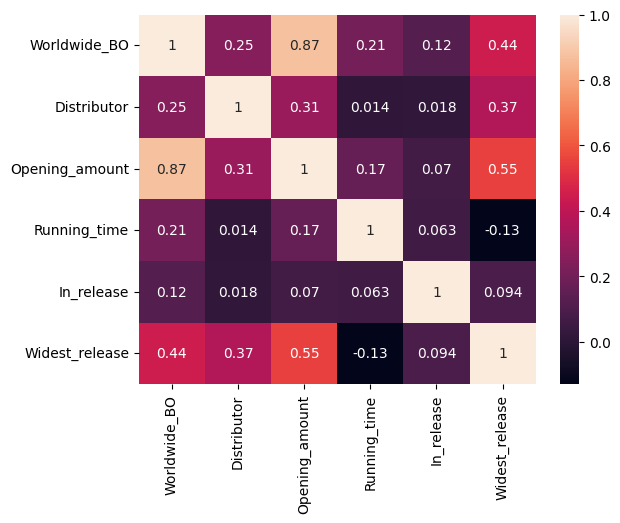

In [75]:
sns.color_palette("flare", as_cmap=True)
corr = df1.corr()
print(corr)
# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

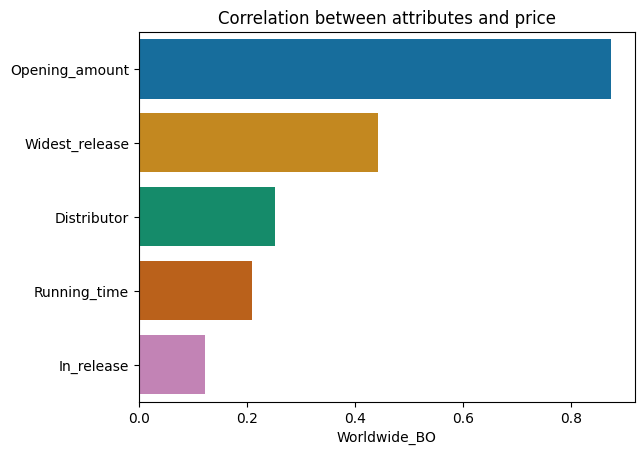

In [76]:
corr = corr.Worldwide_BO;
cr = corr.sort_values(ascending=False)[1:];
sns.barplot(x=cr,y=cr.index,palette="colorblind");
plt.title("Correlation between attributes and price");